Part 1.1 - 20 Degree Polynomial Without Regularization 

MSE on training set:  7.1524955066238824
MSE on validation set:  459.0225100231936


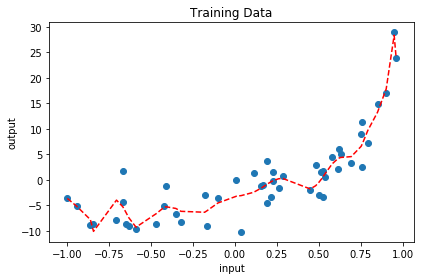

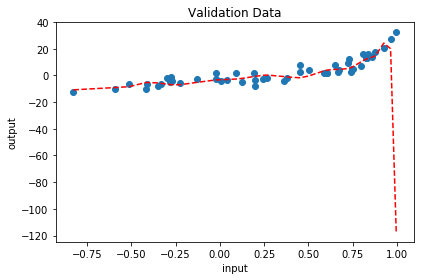

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

TRAIN_DATA = 'data/Dataset_1_train.csv'
VALID_DATA = 'data/Dataset_1_valid.csv'
TEST_DATA = 'data/Dataset_1_test.csv'
PLOT_PRECISION = 60
POLY_DEGREE = 20
NUM_LAMBDA_VALUE = 100

''' Computes the polynomial matrix of a set of data '''
def findPolyMatrix(data_frame, degree):
    data_x = data_frame[0]
    data_y = data_frame[1]
    # create polynomial matrix
    data_frame.drop([1, 2], axis=1, inplace=True)
    for i in range(degree + 1):
        data_frame[i] = np.power(data_x, i)
    # return polynomial and output matrices
    return data_frame, data_y

''' Computes the matrix of weighted coefficients
     W = inv[X^(t)X + LI][X^(t)Y]
     where X = Polynomial Matrix, L=Lambda, I=Identity Matrix, Y=Output Matrix '''
def findWeightedMatrix(poly_matrix, output_matrix, lambd, degree):
    lambd_matrix = np.identity(degree+1) * lambd # LI
    XtX_inv = np.linalg.pinv(np.matmul(poly_matrix.T, poly_matrix) + lambd_matrix) # inv[X^(t)X + LI]
    XtY = np.matmul(poly_matrix.T, output_matrix) # [X^(t)Y]
    w = np.matmul(XtX_inv, XtY)
    return w

''' Computes the mean squared error of a weighted matrix on a data set '''
def findMSE(poly_matrix, weighted_matrix, output_matrix):
    sq_error = np.power(np.subtract(np.matmul(poly_matrix, weighted_matrix), output_matrix), 2)
    return np.sum(sq_error) / sq_error.size

''' Visualizes the data fit on a graph '''
def visualizeDataFit(poly_matrix, weighted_matrix, output_matrix, title):
    output = np.matmul(poly_matrix, weighted_matrix)
    plt.scatter(poly_matrix[1], output_matrix)
    plt.plot(poly_matrix[1], output, 'r--')
    plt.title(title)
    plt.xlabel('input')
    plt.ylabel('output')
    plt.tight_layout()
    plt.show()

''' Compute optimal parameters for lambda and its corresponding mse value'''
def computeOptimalRegularization(train_poly_matrix, train_output_matrix, test_poly_matrix, test_output_matrix, degree):
    lamba_values = []
    mse_values = []
    best_lambda = 0.0
    best_mse = 10000
    interval = 1 / NUM_LAMBDA_VALUE
    lambd = interval
    for i in range(1, NUM_LAMBDA_VALUE):
        w_matrix_reg = findWeightedMatrix(train_poly_matrix, train_output_matrix, lambd, degree)
        mse = findMSE(test_poly_matrix, w_matrix_reg, test_output_matrix)
        lamba_values.append(lambd)
        mse_values.append(mse)
        if best_mse > mse:
            best_lambda = lambd
            best_mse = mse
        lambd += interval
    return best_lambda, best_mse, lamba_values, mse_values

''' Visualizes the regularization'''
def visualizeRegularization(lambd_values, mse_values, title):
    plt.xscale('log')
    plt.plot(lambd_values, mse_values)
    plt.title(title)
    plt.xlabel('Lambda')
    plt.ylabel('Mean Squared Error')
    plt.tight_layout()
    plt.show()

# Read data
train_data = pd.read_csv(TRAIN_DATA, header=None)
valid_data = pd.read_csv(VALID_DATA, header=None)
test_date = pd.read_csv(TEST_DATA, header=None)
train_data.sort_values(by=[0], inplace=True)
valid_data.sort_values(by=[0], inplace=True)
test_date.sort_values(by=[0], inplace=True)

# Compute training/validation/testing matrices
train_poly_matrix, train_output_matrix = findPolyMatrix(train_data, POLY_DEGREE)
valid_poly_matrix, valid_output_matrix = findPolyMatrix(valid_data, POLY_DEGREE)
test_poly_matrix, test_output_matrix = findPolyMatrix(test_date, POLY_DEGREE)

# Part 1: 20-degree polynomial without regularization
w_matrix_no_reg = findWeightedMatrix(train_poly_matrix, train_output_matrix, 0, POLY_DEGREE)
mse_no_reg_train = findMSE(train_poly_matrix, w_matrix_no_reg, train_output_matrix)
mse_no_reg_valid = findMSE(valid_poly_matrix, w_matrix_no_reg, valid_output_matrix)
print('Part 1.1 - 20 Degree Polynomial Without Regularization \n')
print('MSE on training set: ', mse_no_reg_train)
print('MSE on validation set: ', mse_no_reg_valid)
visualizeDataFit(train_poly_matrix, w_matrix_no_reg, train_output_matrix, 'Training Data')
visualizeDataFit(valid_poly_matrix, w_matrix_no_reg, valid_output_matrix, 'Validation Data')

Part 1.2 (a) - 20 Degree Polynomial With Regularization 

Best lambda on training set:  0.01  - MSE:  8.807610880442786
Best lambda on validation set:  0.02  - MSE:  9.13509878469384


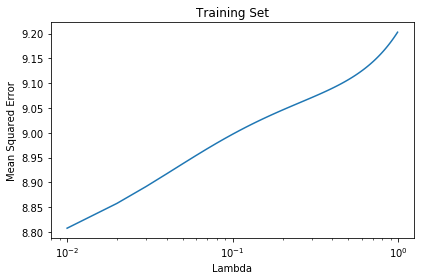

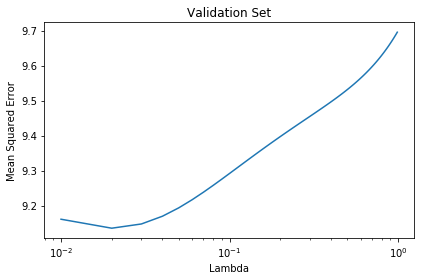

In [17]:
# Part 2: 20-degree polynomial with regularization
best_lambda_train, best_mse_train, lambda_values_train, mse_values_train = computeOptimalRegularization(
    train_poly_matrix, train_output_matrix, train_poly_matrix, train_output_matrix, POLY_DEGREE)

best_lambda_val, best_mse_val, lambda_values_val, mse_values_val = computeOptimalRegularization(
    train_poly_matrix, train_output_matrix, valid_poly_matrix, valid_output_matrix, POLY_DEGREE)

print('Part 1.2 (a) - 20 Degree Polynomial With Regularization \n')
print('Best lambda on training set: ', best_lambda_train, ' - MSE: ', best_mse_train)
print('Best lambda on validation set: ', best_lambda_val, ' - MSE: ', best_mse_val)
visualizeRegularization(lambda_values_train, mse_values_train, 'Training Set')
visualizeRegularization(lambda_values_val, mse_values_val, 'Validation Set')

Part 1.2 (b) - Computatation Using Optimal Lambda 

Computation using lambda =  0.02
MSE =  10.730218400927399


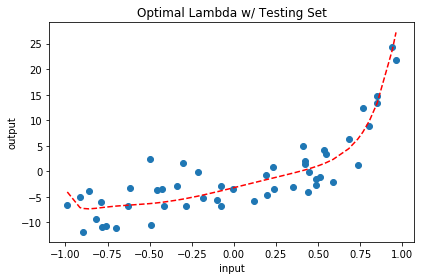

In [16]:
# Testing set with best lambda
w_optimal = findWeightedMatrix(train_poly_matrix, train_output_matrix, best_lambda_val, POLY_DEGREE)
test_mse = findMSE(test_poly_matrix, w_optimal, test_output_matrix)
print('Part 1.2 (b) - Computatation Using Optimal Lambda \n')
print('Computation using lambda = ', best_lambda_val)
print('MSE = ', test_mse)
visualizeDataFit(test_poly_matrix, w_optimal, test_output_matrix, 'Optimal Lambda w/ Testing Set')